In [114]:
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def clean_names(names):
    # strip and removal of duplicates
    return set([name.strip() for name in names])


gdf = geopandas.read_file("../Downloads/regions/v2020.gpkg")
station_data = pd.read_csv("../Downloads/tellingit_2017-2021.csv", sep=';', decimal=',')
station_data = station_data[station_data['year'] == 2020]

station_names = clean_names(station_data[station_data['year'] == 2020]['name'].unique())
station_ids = station_data[station_data['year'] == 2020]['id'].unique()



for ids in station_ids:
    name = station_data[station_data['id'] == ids].iloc[0]['name']
    names_ids[ids] = name

names_ids = {}

station_data = station_data.drop_duplicates(subset = ["name"])

station_data = station_data[station_data['x'] < 30.0]
print(station_data.shape)

(457, 7)


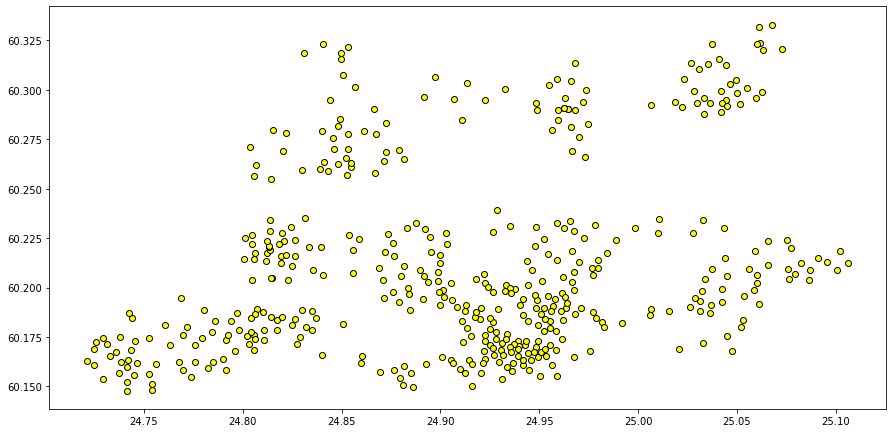

In [115]:

station_gdf = geopandas.GeoDataFrame(
    station_data, geometry=geopandas.points_from_xy(pd.to_numeric(station_data.x), pd.to_numeric(station_data.y))
)
ax = station_gdf.plot(figsize=(15,15),color='yellow', edgecolor='black')



(106212, 8)


<AxesSubplot:>

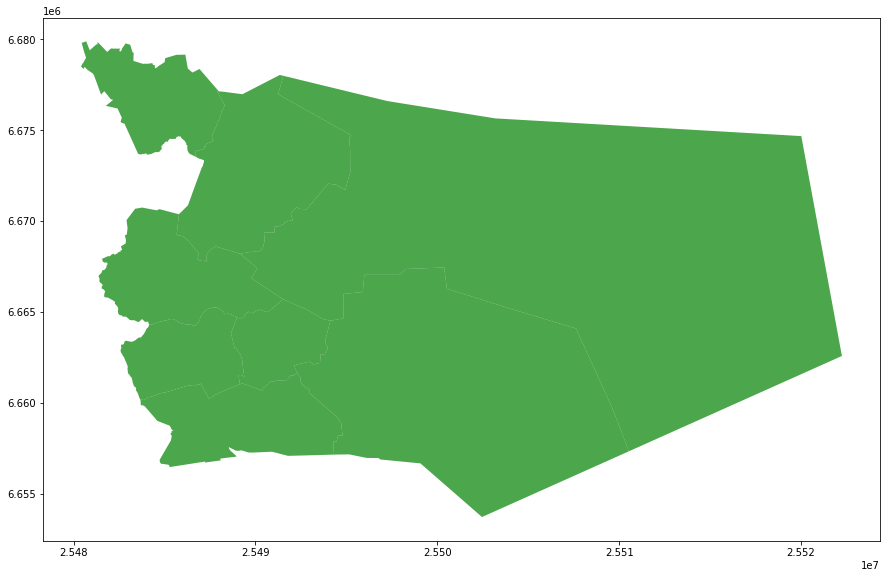

In [150]:

gdf.plot(color='green', alpha=0.7, figsize=(15,15))


epsg:3879


<AxesSubplot:>

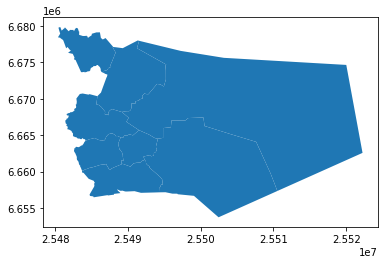

In [143]:

print(gdf.crs)
station_gdf = station_gdf.set_crs(epsg=3879)
gdf = gdf.rotate(270, origin=gdf.unary_union.centroid)
gdf.plot()

[]

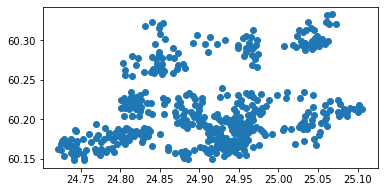

In [132]:
ax = station_gdf.plot()
ax.plot()
#gdf.plot(ax=ax,  alpha=0.8)